## Sentiment Analysis

This notebook generates the sentiment of articles as features (polarity and subjectivity) and plots them over time.

We use the sentiment model of TextBlob library.
TextBlob measures sentiment through polarity ranging from -1.0 to 1.0, where 1 means a positive statement and -1 means a negative statement. 
It also calculates subjectivity which ranges from 0 to 1.0, where 0 is very objective and 1.0 is very subjective.

#### Input:

ws2_1_article_clean.csv: 

This dataset contains all the clean articles, obtained from the `ws2_1_data_preparation` notebook.

#### Output:

ws2_3_sentiment.csv:

The code will produce the sentiment results as features. It is structured in 4 columns: an article ID, a publication date, a polarity, and a subjectivity score.

#### This notebook includes the following components:

- Import libraries
- Import data
- Sentiment Analysis: Polarity and Subjectivity
- Save data
- Plots of Polarity and Subjectivity Over Time 

### Import Libraries

In [ ]:
# install and import libraries
!pip install textblob
from textblob import TextBlob

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Configuration parameters

In [2]:
# The path to the output folder where all the outputs will be saved
output_path = "/project_data/data_asset"

### Import Data
Import data that is cleaned and prepared in `ws_1_data_preparation` notebook.

In [3]:
articles = pd.read_csv(f"{output_path}/ws2_1_article_clean.csv")
articles.head()

,article_id,article,date,n_words,article_clean,n_words_clean
0,0,an acquaintance in Post-Polio >Syndrome This a...,2020-01-01,160,acquaintance post polio syndrome apparently ne...,64
1,1,"homore in high school. Before that, I used to ...",2020-01-02,81,homore high school bloody nose nighttime asthm...,26
2,2,"7:26 GMT On 5 Apr 93 23:27:26 GMT, (Vida Morku...",2020-01-03,280,gmt apr gmt vida morkunas vida inner ear probl...,123
3,3,tes about heat shock proteins (HSP's) and DNA....,2020-01-04,159,te heat shock protein hsp dna hate derogatory ...,55
4,4,now mapping the human genome. We will > then s...,2020-01-05,290,human genome manipulation genome genetic engin...,119


### Sentiment Analysis: Polarity and Subjectivity

In [4]:
# sentiment analysis on 'article_clean' column 

articles["date"] = pd.to_datetime(articles["date"])
articles['polarity'] = articles['article_clean'].apply(lambda x : TextBlob(x).sentiment.polarity)
articles['subjectivity'] = articles['article_clean'].apply(lambda x : TextBlob(x).sentiment.subjectivity)

### Save Data

In [5]:
# save data to the project data files

articles[['article_id', 'date', 'polarity', 'subjectivity']].to_csv(f"{output_path}/ws2_3_sentiment.csv", index = False)

### Plots of Polarity Over Time 

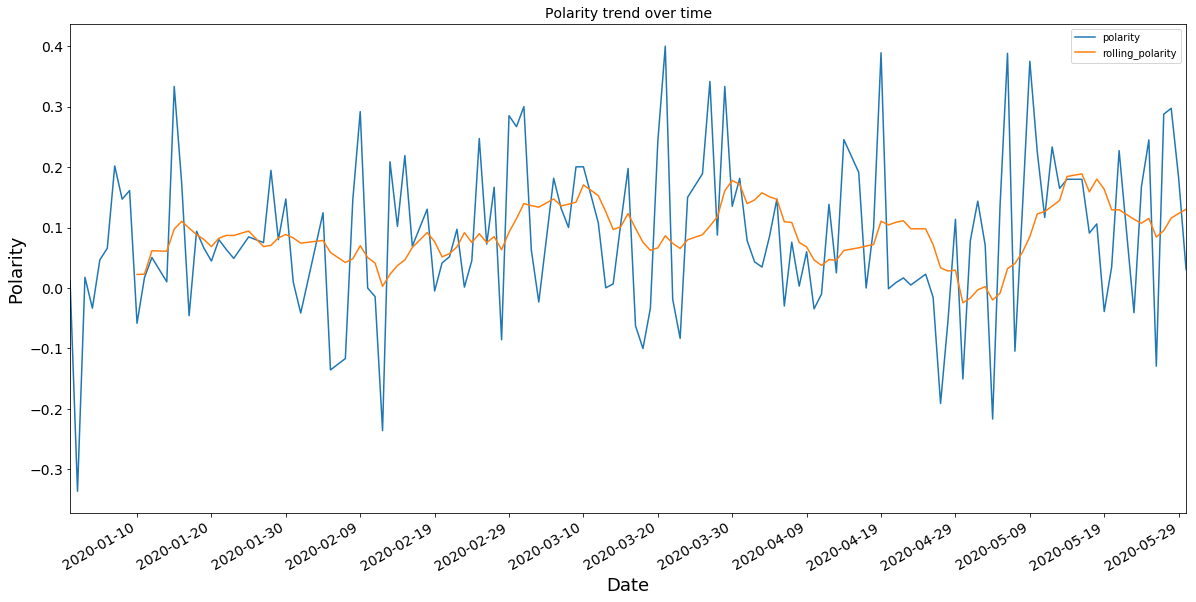

In [6]:
df = articles[["date", "polarity", "subjectivity"]].groupby("date").mean().reset_index()
df['rolling_polarity'] = df.polarity.rolling(window=10).mean()
df['rolling_subjectivity'] = df.subjectivity.rolling(window=10).mean()
ax = df.plot(x="date", 
        y=["polarity", "rolling_polarity"], 
        figsize=(20, 10), 
        fontsize=14)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.xlabel("Date", fontsize=18)
plt.ylabel("Polarity", fontsize=18)
plt.title("Polarity trend over time", fontsize=14)
plt.show()

### Plot of Subjectivity Over Time

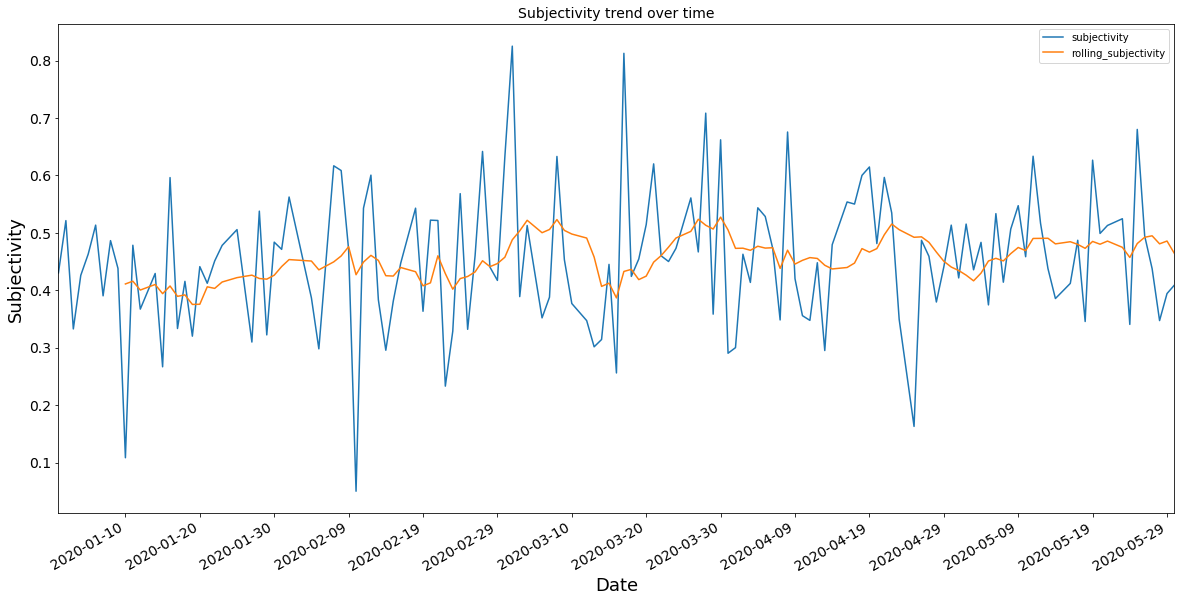

In [7]:
ax = df.plot(x="date", 
        y=["subjectivity", "rolling_subjectivity"], 
        figsize=(20, 10), 
        fontsize=14)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.xlabel("Date", fontsize=18)
plt.ylabel("Subjectivity", fontsize=18)
plt.title("Subjectivity trend over time", fontsize=14)
plt.show()

#### Authors
    
* **Mehrnoosh Vahdat** is Data Scientist with Data Science & AI Elite team where she specializes in Data Science, Analytics platforms, and Machine Learning solutions.
* **Vincent Nelis** is Senior Data Scientist with Data Science & AI Elite team where he specializes in Data Science, Analytics platforms, and Machine Learning solutions.
* **Swetha Batta** is Lead Full Stack Developer with IBM Cloud and Cognitive Software where she specializes in Software Development, Back-end and Front-end Development.

Copyright © IBM Corp. 2020. Licensed under the Apache License, Version 2.0. Released as licensed Sample Materials.